<a href="https://colab.research.google.com/github/Ajayumbarkar/Data_Science-Projects/blob/main/Twitter_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='import_lib'></a>
# 1. Import Libraries

In [ ]:
#importing the drive for required file
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/NLP'

Mounted at /gdrive
/gdrive/My Drive/NLP


In [ ]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string 
string.punctuation
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


<a id='RD'></a>
# 2. Read Data

In [ ]:
data = pd.read_csv("train.csv")
data



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df = data.copy()
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [ ]:
df.drop('id', axis = 1 , inplace = True)

In [ ]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
df['label'].value_counts()/len(df['label'])*100

0    92.98542
1     7.01458
Name: label, dtype: float64

In [ ]:
df.shape

(31962, 2)

<a id='import_lib'></a>
# 3. Data Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [ ]:
# missing values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()


2432

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.shape


(29530, 2)

<a id='import_lib'></a>
# 4. EDA


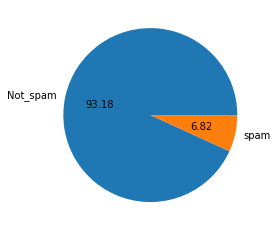

In [ ]:
#autopct="%0.2f" To show the percentage
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['Not_spam','spam'], autopct="%0.2f")
plt.show()


In [ ]:
import nltk


In [ ]:
!pip install nltk


In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['tweet'].apply(len)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.sample(5)

,label,tweet,num_characters
24715,1,@user @user coming from and #powerhungrytrait...,74
31363,0,so sad. literally if anyone wants to buy me a ...,113
20882,0,date with bambi ð #bambi #deer #instaanimal...,98
24064,0,@user tickets bought for me and @user also go...,110
8212,0,yep! #noone wants to #hear the #truth! #am...,106


In [ ]:
df['num_words'] = df['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

0        21
1        27
2         3
3        18
4         6
         ..
31956    12
31957     8
31958    26
31959    13
31961     7
Name: tweet, Length: 29530, dtype: int64

In [ ]:
df['num_sentence'] = df['tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.sample(5)

,label,tweet,num_characters,num_words,num_sentence
16762,0,i didn't know crowder was such an ass...,43,10,1
20107,0,showtime #conjuring2 #vetritheatre,37,5,1
84,0,use the power of your mind to #heal your body!...,88,21,2
8394,0,@user woohoo!! just over 5 weeks to go!,43,12,2
1674,0,harry potter tickets arrived!!!! @user #harryp...,53,12,2


In [ ]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentence']].describe()


,num_characters,num_words,num_sentence
count,27517.000000,27517.000000,27517.000000
mean,84.810590,18.029509,1.616855
std,29.976615,6.889266,0.830213
min,11.000000,3.000000,1.000000
25%,62.000000,13.000000,1.000000
50%,89.000000,18.000000,1.000000
75%,108.000000,23.000000,2.000000
max,274.000000,121.000000,14.000000


In [ ]:
# spam
df[df['label'] == 1][['num_characters','num_words','num_sentence']].describe()


,num_characters,num_words,num_sentence
count,2013.000000,2013.000000,2013.000000
mean,91.416791,19.224044,1.653751
std,27.989697,6.554329,0.834061
min,12.000000,3.000000,1.000000
25%,74.000000,15.000000,1.000000
50%,98.000000,20.000000,1.000000
75%,112.000000,24.000000,2.000000
max,152.000000,39.000000,9.000000


In [ ]:
import seaborn as sns


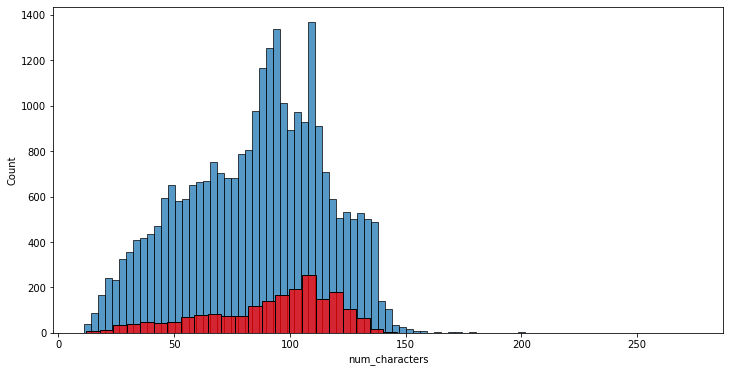

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')


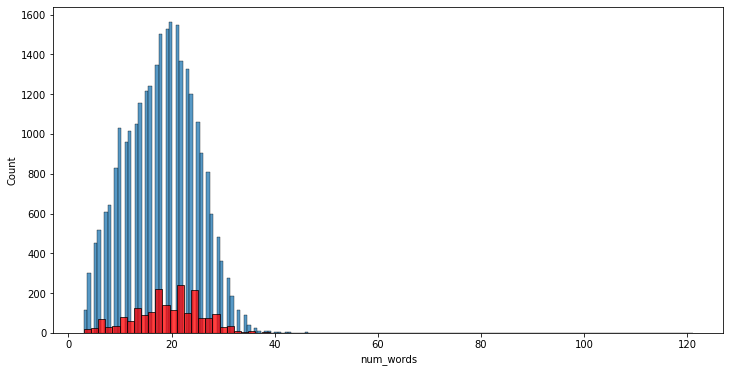

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')


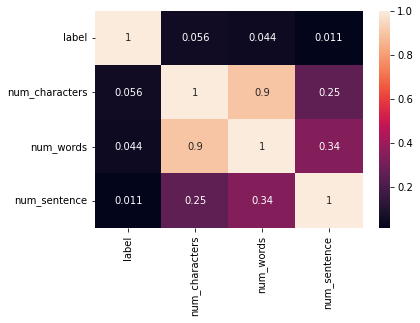

In [ ]:
sns.heatmap(df.corr(),annot=True)


<a id='import_lib'></a>
# 5. Data Preprocessing



Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df['transformed_text'] = df['tweet'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.sample(5)

,label,tweet,num_characters,num_words,num_sentence,transformed_text
17446,0,love your body just the way it is &amp; your r...,104,20,1,love bodi way amp relationship food chang spar...
1591,0,love this dresser from vendor 187 for $249.00!...,88,17,2,love dresser vendor 187 shopalyssa upsideofflo...
14607,0,i need this book asap! wow! #foodporn #vegan ...,75,16,3,need book asap wow foodporn vegan healthylifes...
9385,0,u chi a ge ð¤. #school #festival #was #lau...,94,26,2,u chi ge school festiv lauch enjoy time ootd f...
24935,0,@user @user why don't you prove you're indian!...,112,27,2,user user prove indian nasti person use lie li...


In [ ]:
from wordcloud import WordCloud


In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')


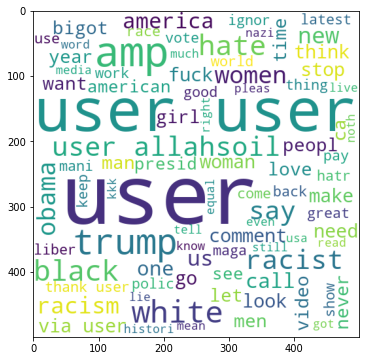

In [ ]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


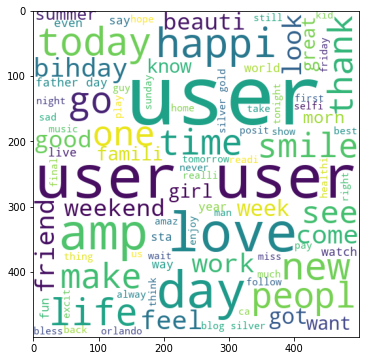

In [ ]:
spam_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat())
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


<a id='import_lib'></a>
# 6. Split Data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df[['label']]

In [ ]:
X.head()

,transformed_text
0,user father dysfunct selfish drag kid dysfunct...
1,user user thank lyft credit ca use caus offer ...
2,bihday majesti
3,model love u take u time
4,factsguid societi motiv


In [ ]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)




<a id='import_lib'></a>
# 7. Navie Bays


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score


In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9520826278360989
[[5509   10]
 [ 273  114]]
0.9193548387096774
0.29457364341085274


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5519
           1       0.92      0.29      0.45       387

    accuracy                           0.95      5906
   macro avg       0.94      0.65      0.71      5906
weighted avg       0.95      0.95      0.94      5906



In [ ]:
pred_train = mnb.predict(X_train)


In [ ]:
#Naive bays
print("precision on train data:",precision_score(y_train,pred_train))
print("precision on test data:",precision_score(y_test,y_pred))
print("\n")
print("f1 on train data:",f1_score(y_train,pred_train))
print("f1 on test data:",f1_score(y_test,y_pred))
print("\n")


precision on train data: 0.9216061185468452
precision on test data: 0.9193548387096774


f1 on train data: 0.4485807352256863
f1 on test data: 0.44618395303326813




In [ ]:
print("fbeta on train data:",fbeta_score(y_train,pred_train,beta=0.3))
print("fbeta on test data:",fbeta_score(y_test,y_pred,beta=0.3))
print("\n")


fbeta on train data: 0.7849224609316641
fbeta on test data: 0.7823459044261162




<a id='import_lib'></a>
# 8. Random ForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [ ]:

pred_y = rf.predict(X_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(precision_score(y_test,pred_y))
print(recall_score(y_test,pred_y))


0.9578394852692177
[[5474   45]
 [ 204  183]]
0.8026315789473685
0.4728682170542636


In [ ]:
from sklearn.model_selection import RandomizedSearchCV